In [2]:
options(warn = -1)
suppressPackageStartupMessages({
  library(tidyverse)
  library(tidyquant)
  library(stochvol)
  })

In [3]:
acao <- "^BVSP"
retornos <- tq_get(acao, from = "2015-01-01") %>%
  tq_transmute(select = adjusted, mutate_fun = dailyReturn)

Argument 'y' (data vector) contains values very close to zero. I am applying an offset constant of size 1.7230397333928e-06 to do the auxiliary mixture sampling. If you want to avoid this, you might consider de-meaning the returns before calling this function.

Done!

Summarizing posterior draws...



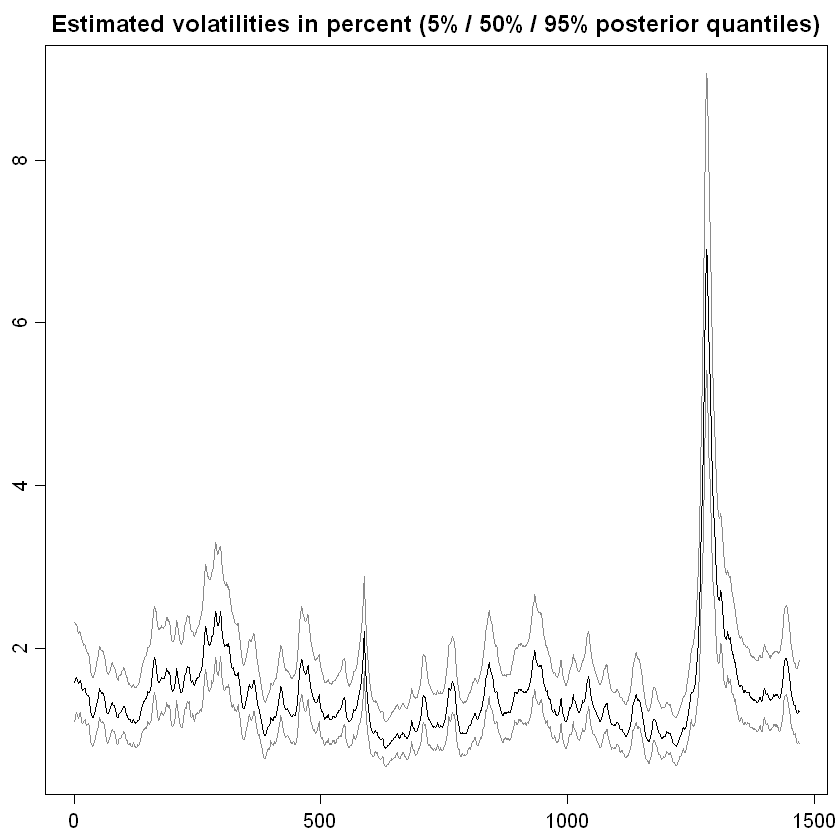

In [4]:
volatilidade <- svsample(retornos$daily.returns)
volplot(volatilidade)

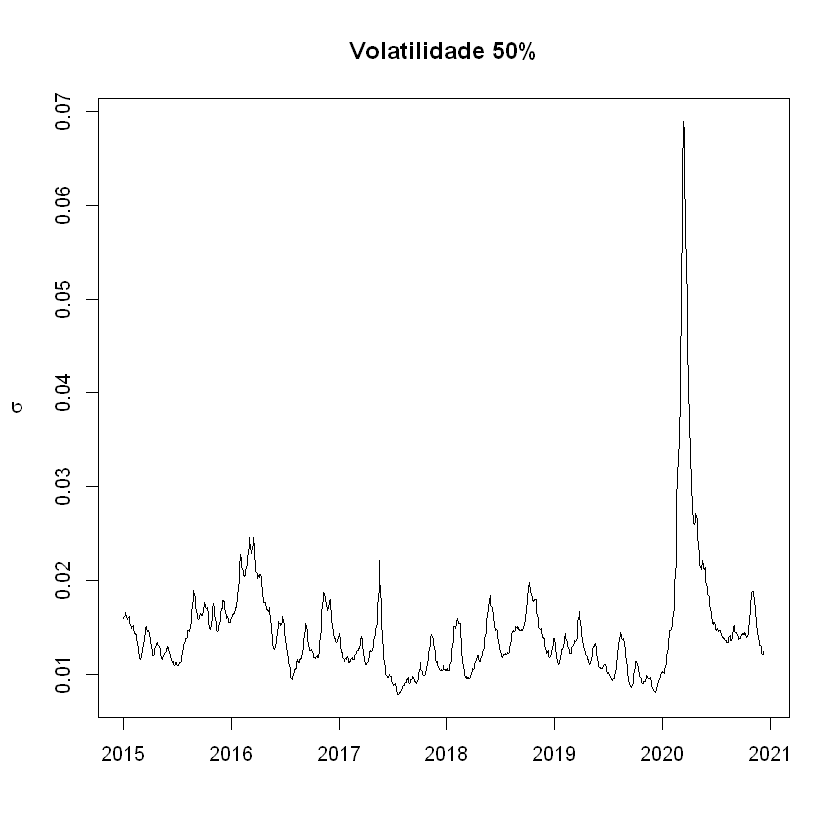

In [5]:
vol50 <- exp(volatilidade$summary$latent[,4,drop = F]/2)
plot(retornos$date,vol50, type = "l",xlab = "", ylab = expression(sigma),
     main = "Volatilidade 50%")

In [7]:
#Previsão
dias_pre <- 10
pre <- predict(volatilidade, dias_pre)
quantias <- c(0.1,0.5,0.9)
quantia <- apply(pre$h[[1]],2,quantile, prob = quantias)
vol_pre <- exp(quantia/2)
try(if(nrow(vol_pre) > 1){
  vol_pre <- vol_pre %>% t
}, silent = T)

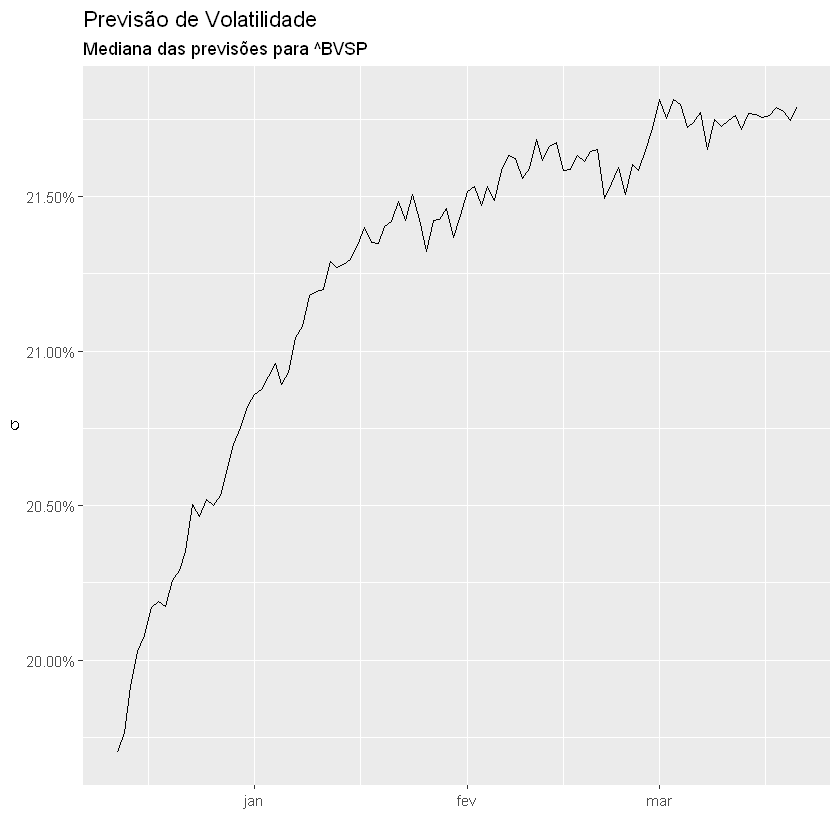

In [8]:
data <- data.frame(date = datas, vol = vol_pre)
if(ncol(data) > 2){
  data <- data %>%
    gather(key = "quantile", value = "vol", -date)
  ggplot(data, aes(x = date, y = vol*sqrt(252), group = quantile))+
    geom_line()+
    labs(x = "", y = expression(sigma),
         title = "Previsão de Volatilidade",
         subtitle = paste("Mediana das previsões para",acao))+
    scale_y_continuous(labels = scales::percent)
}else{
  ggplot(data, aes(x = date, y = vol*sqrt(252)))+
    geom_line()+
    labs(x = "", y = expression(sigma),
         title = "Previsão de Volatilidade",
         subtitle = paste("Mediana das previsões para",acao))+
    scale_y_continuous(labels = scales::percent)
}

In [9]:
volatilidade


Summary of 'svdraws' object

Prior distributions:
mu        ~ Normal(mean = 0, sd = 100)
(phi+1)/2 ~ Beta(a = 5, b = 1.5)
sigma^2   ~ Gamma(shape = 0.5, rate = 0.5)
nu        ~ Infinity
rho       ~ Constant(value = 0)

Stored 10000 MCMC draws after a burn-in of 1000.
No thinning.

Posterior draws of SV parameters (thinning = 1):
            mean    sd     5%    50%    95%  ESS
mu        -8.575 0.147 -8.813 -8.577 -8.336 5077
phi        0.959 0.013  0.935  0.961  0.978  271
sigma      0.202 0.032  0.155  0.200  0.258  181
exp(mu/2)  0.014 0.001  0.012  0.014  0.015 5077
sigma^2    0.042 0.013  0.024  0.040  0.066  181
